In [ ]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import  matplotlib.pyplot as plt

In [229]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\WineQT.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [231]:
data.isnull().sum()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [232]:
#y=data.drop("quality")
data.drop(columns=["Id"],inplace=True)
x=data.drop(columns=["quality"])
y=data["quality"]

In [235]:

x1,x2,y1,y2=train_test_split(x,y,test_size=0.3,random_state=42)

In [237]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x1,y1)
pred=model.predict(x2)
accuracy_score(y2,pred)

0.5860058309037901

In [241]:
confusion_matrix(y2,pred)

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   6,   2,   1,   0],
       [  0,   2, 104,  30,   6,   1],
       [  2,   2,  40,  76,  21,   5],
       [  0,   2,   5,  13,  18,   3],
       [  0,   0,   0,   0,   1,   3]], dtype=int64)

In [243]:
#classification_report(pred,y2)

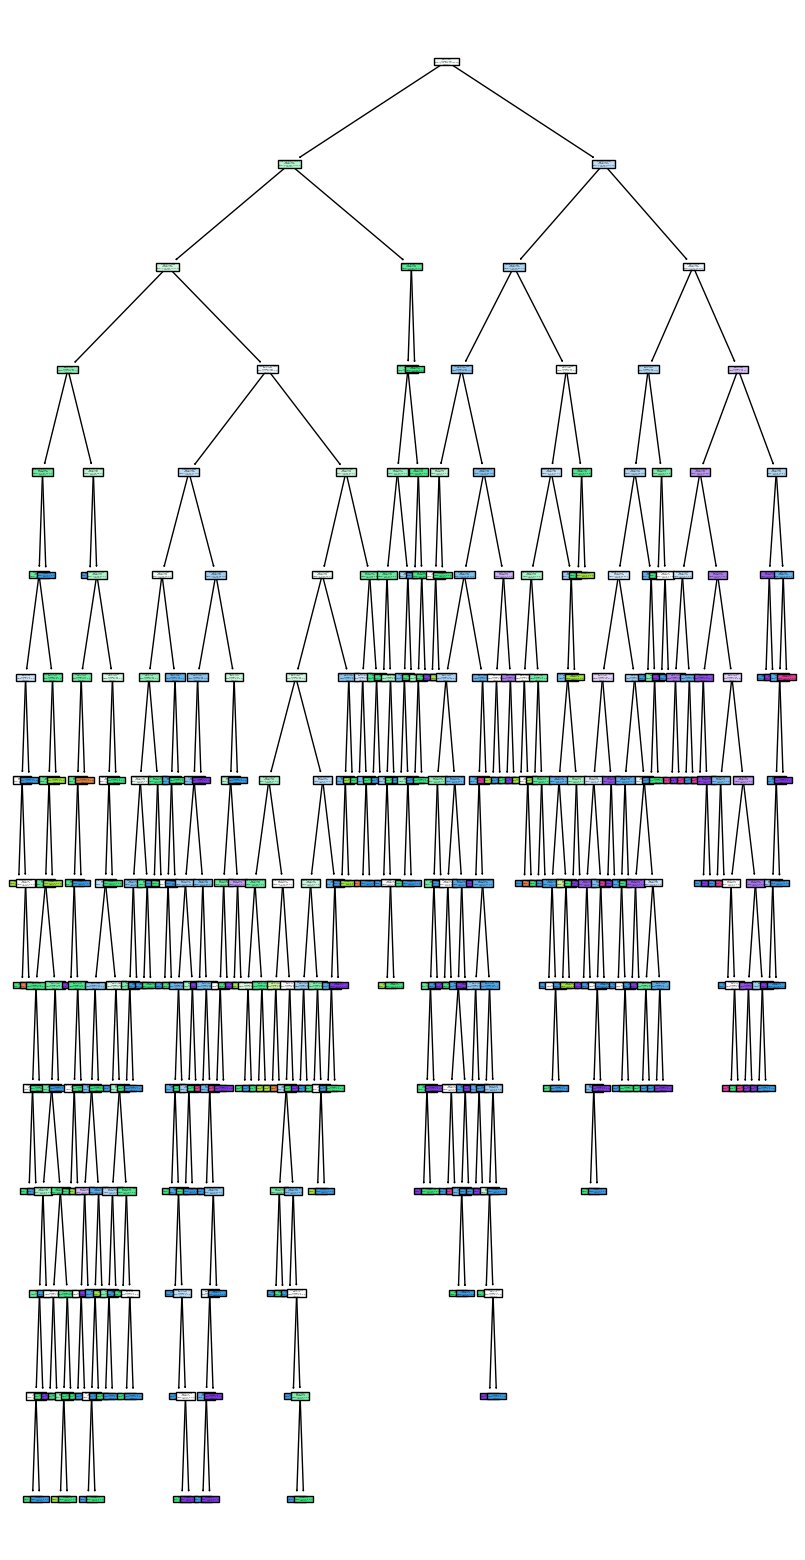

In [245]:
plt.figure(figsize=(10,20))
plot_tree(model,feature_names=x.columns,class_names=[str(c) for c in sorted(y.unique())],filled=True)
plt.show()

In [247]:
# enhance the model performance by feature scalinng 
data['total acidity']=data['fixed acidity']+data['volatile acidity']
data['density_ph']=data['density']*data['pH']
data['sulphates_chlorides']=data['sulphates']/data['chlorides']
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity,density_ph,sulphates_chlorides
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,8.10,3.502278,7.368421
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,8.68,3.189760,6.938776
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,8.56,3.250220,7.065217


In [248]:
indx=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol','total acidity','density_ph','sulphates_chlorides']
data[indx]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,total acidity,density_ph,sulphates_chlorides
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,8.100,3.502278,7.368421
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,8.680,3.189760,6.938776
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,8.560,3.250220,7.065217
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,11.480,3.153680,7.733333
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,8.100,3.502278,7.368421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.810,3.405431,9.868421
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,7.420,3.408064,12.058824
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,6.800,3.432405,6.444444
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.450,3.502822,12.258065


In [249]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data[indx]=ss.fit_transform(data[indx])

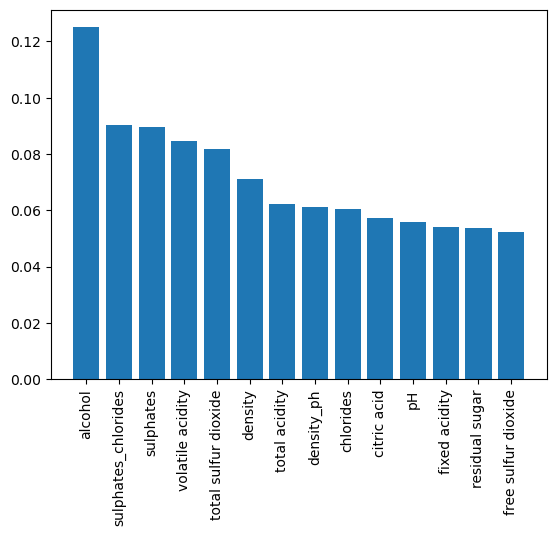

In [281]:
from sklearn.ensemble import RandomForestClassifier
x=data.drop(columns=["quality"])
y=data["quality"]
x1,x2,y1,y2=train_test_split(x,y,test_size=0.2,random_state=42)
mod=RandomForestClassifier()
mod.fit(x,y)
importance=mod.feature_importances_
importance
indices=np.argsort(importance)[::-1]
plt.bar(range(x.shape[1]),importance[indices],align='center')
plt.xticks(range(x.shape[1]),[indx[i] for i in indices],rotation=90)
plt.show()

In [321]:

model=DecisionTreeClassifier(random_state=42)
model.fit(x1,y1)
pred=model.predict(x2)
accuracy_score(y2,pred)

0.611353711790393